# Bank Marketing Effectiveness Prediction
## By Rahul Inchal

### Business Context
The data is related to the marketing campaign(phone calls) of a portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to assess the product(bank term deposite) would be('Yes') or not('no') subscribed. The classification goal is to predict if the client will subscribe to the term deposite( Variable Y) 



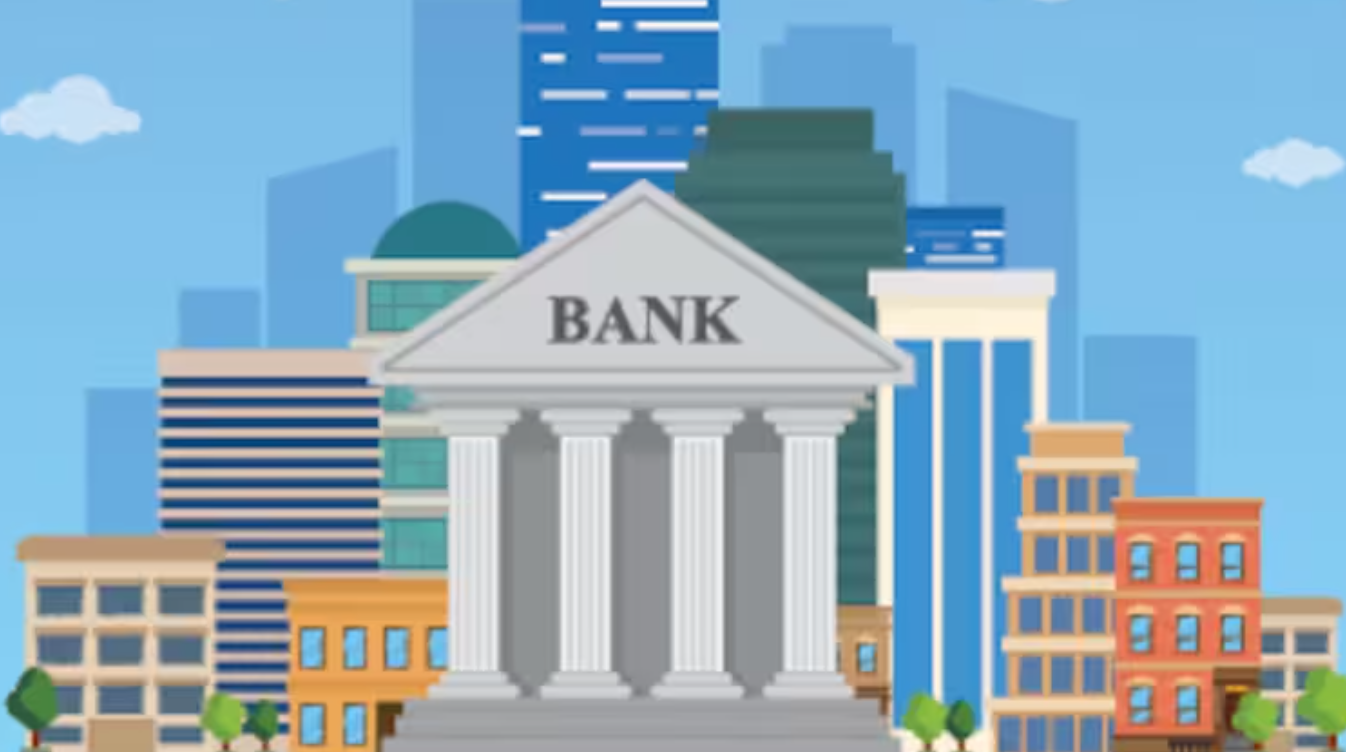

### GitHub
https://github.com/rahulinchal/Bank-Marketing-Effectiveness-prediction

### Importing important Packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

# Filtering warnings
import warnings
warnings.filterwarnings('ignore')

# Displaying maximum columns
pd.set_option('display.max_columns', None)

In [2]:
# Loading the dataset
df = pd.read_csv("https://raw.githubusercontent.com/rahulinchal/Bank-Marketing-Effectiveness-prediction/main/bank-full.csv",
                sep = ';')

## Attribute Information:

Input variables:
### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown') <br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
4 - education (categorical: basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown') <br>
5 - default: has credit in default? (categorical: 'no','yes','unknown') <br>
6 - housing: has housing loan? (categorical: 'no','yes','unknown') <br>
7 - loan: has personal loan? (categorical: 'no','yes','unknown') <br>
### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') <br>
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri') <br>
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. <br>
### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact) <br>
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted) <br>
14 - previous: number of contacts performed before this campaign and for this client (numeric) <br>
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success') <br>
### Output variable (desired target):
16 - y - has the client subscribed a term deposit? (binary: 'yes','no') <br>

In [3]:
# Getting the first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### As per the documentation, the Duration column has to be removed because this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [4]:
# Dropping the duration column
df.drop(['duration'], axis = 1, inplace = True)

In [5]:
# Getting the first 5 rows
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


## Data Wrangling

In [6]:
# Getting the shape
df.shape

(45211, 16)

### Finding if there are null values

In [7]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### There are no null values

In [8]:
# Checking for duplicate values
df.duplicated().sum()

16

In [9]:
# Dropping the null values
df = df.drop_duplicates()

In [10]:
# Getting the info of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45195 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45195 non-null  int64 
 1   job        45195 non-null  object
 2   marital    45195 non-null  object
 3   education  45195 non-null  object
 4   default    45195 non-null  object
 5   balance    45195 non-null  int64 
 6   housing    45195 non-null  object
 7   loan       45195 non-null  object
 8   contact    45195 non-null  object
 9   day        45195 non-null  int64 
 10  month      45195 non-null  object
 11  campaign   45195 non-null  int64 
 12  pdays      45195 non-null  int64 
 13  previous   45195 non-null  int64 
 14  poutcome   45195 non-null  object
 15  y          45195 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.9+ MB


In [11]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [12]:
df.describe().T.style.background_gradient() # Getting the mathematical answers using Describe function

,count,mean,std,min,25%,50%,75%,max
age,45195.000000,40.937604,10.619108,18.000000,33.000000,39.000000,48.000000,95.000000
balance,45195.000000,1362.754331,3045.196838,-8019.000000,72.000000,449.000000,1428.000000,102127.000000
day,45195.000000,15.804824,8.322816,1.000000,8.000000,16.000000,21.000000,31.000000
campaign,45195.000000,2.763978,3.098304,1.000000,1.000000,2.000000,3.000000,63.000000
pdays,45195.000000,40.212413,100.143468,-1.000000,-1.000000,-1.000000,-1.000000,871.000000
previous,45195.000000,0.580529,2.303823,0.000000,0.000000,0.000000,0.000000,275.000000


<AxesSubplot:>

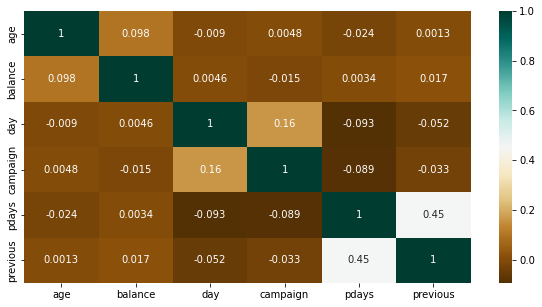

In [13]:
# Plotting a heat map
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),cmap="BrBG",annot=True)

## Data Visualization

In [14]:
df.head() # FInding the head

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [15]:
df['y'].value_counts() # Calculating the value counts

no     39906
yes     5289
Name: y, dtype: int64

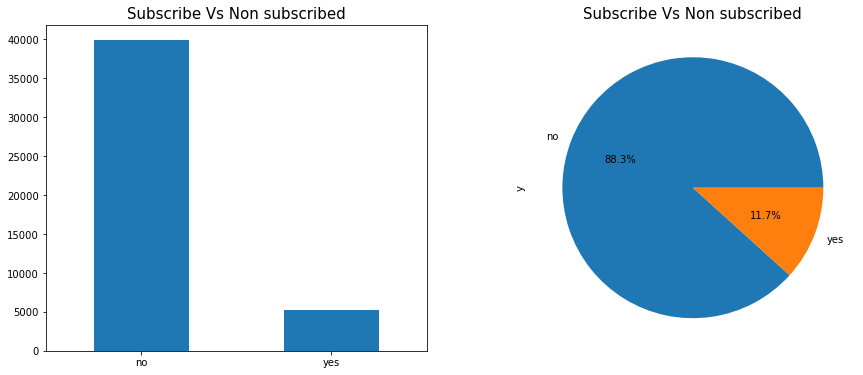

In [16]:
plt.figure(figsize = (15,6))

plt.subplot(1,2,1)
df['y'].value_counts().plot(kind = 'bar')  # Plotting the bar graph
plt.title("Subscribe Vs Non subscribed", fontsize = 15)
plt.xticks(rotation = 360)

plt.subplot(1,2,2)
df['y'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%') #plotting the pie chart for the same
plt.title("Subscribe Vs Non subscribed", fontsize = 15)
plt.show()

### Observation
From this data we can see that 88% customers did not subscribed for Term deposit

From the above plot we can observe that our dataset is highly imbalanced. Majority of the data points belong to no class. Ratio of No class to yes class is 8:1.

In [17]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


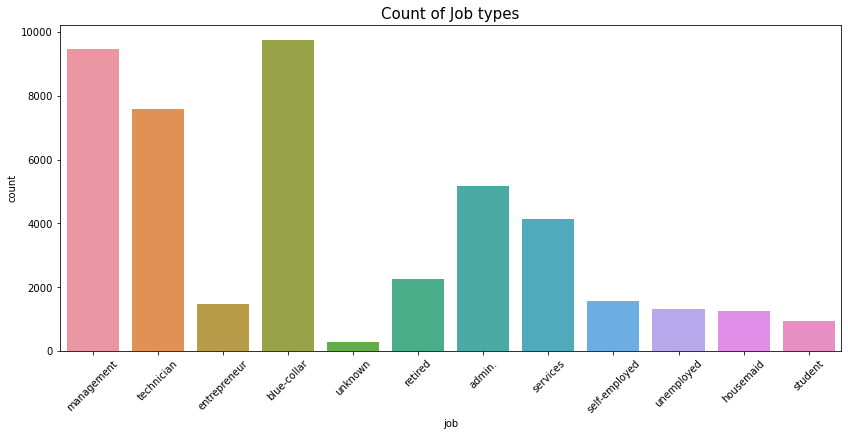

In [18]:
plt.figure(figsize = (14,6))
sns.countplot(data = df, x = df['job'])
plt.xticks(rotation = 45)
plt.title("Count of Job types", fontsize = 15)
plt.show()

### Observation
we can see that most of the customers have jobs as "management", "blue-collar" or "technician".

In [19]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [20]:
df['marital'].value_counts()

married     27208
single      12780
divorced     5207
Name: marital, dtype: int64

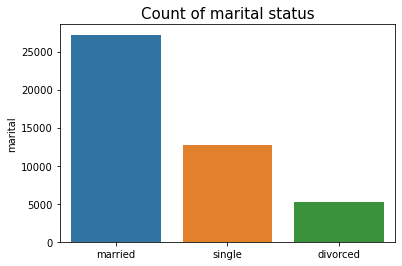

In [21]:
sns.barplot(data = df, x = df['marital'].value_counts().keys(), y = df['marital'].value_counts())
plt.title("Count of marital status", fontsize = 15)
plt.show()

Client who married are high in records in given dataset and divorced are less

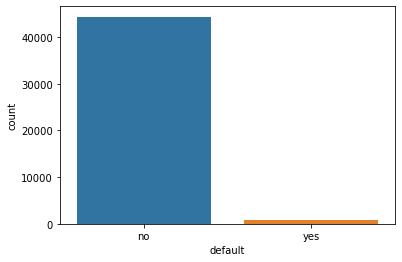

In [22]:
sns.countplot(x='default', data=df)
plt.show()

defualt feature seems to be does not play important role as it has value of no at high ratio to value yes which can drop 

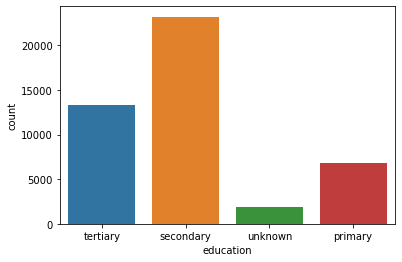

In [23]:
sns.countplot(x='education', data=df)
plt.show()

education background is secondary are in high numbers in given dataset

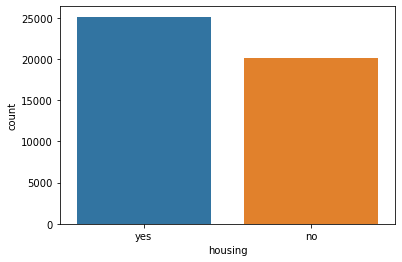

In [24]:
sns.countplot(x='housing', data=df)
plt.show()

People with housing loan are the most ones

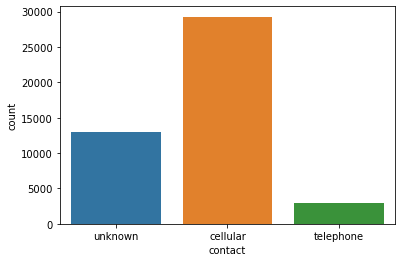

In [25]:
sns.countplot(x='contact', data=df)
plt.show()

Cellular contacts are more compared to telphone

<AxesSubplot:xlabel='month', ylabel='count'>

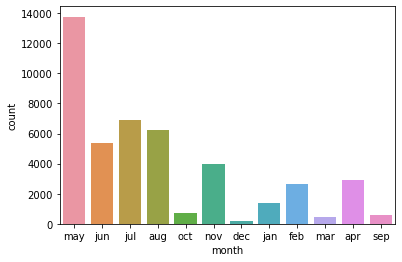

In [26]:
sns.countplot(x='month', data=df)

May has the most last contact month of year

<AxesSubplot:xlabel='poutcome', ylabel='count'>

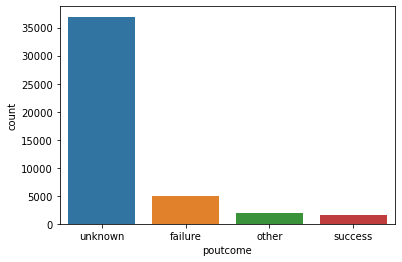

In [27]:
sns.countplot(x='poutcome', data=df)

## This feature indicates the outcome of the previous marketing campaign

Majority of the outcome of the previous campaign is Non-Existent. Very few people counts who successfully subscribed from previous marketing strategy.

### The visualization is being done. Now we head to model building

## One hot encoding
What is meant by one-hot encoding? <br>
One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning.

In [29]:
# One hot encoding
df = pd.get_dummies(df, columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month',
                                   'poutcome'])

In [30]:
# Finding head of the data after one hot encoding
df.head()

,age,balance,day,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,1,-1,0,no,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,29,5,1,-1,0,no,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,2,5,1,-1,0,no,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,1,-1,0,no,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,1,5,1,-1,0,no,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [31]:
# Finding shape
df.shape

(45195, 51)

In [32]:
# Replacing the dependent variable with 0 and 1
df['y'].replace({'no': 0, 'yes': 1}, inplace = True)

In [33]:
df['y'].value_counts() # FInding the value counts

0    39906
1     5289
Name: y, dtype: int64

### Defining X and Y

In [34]:
x = df.drop(['y'], axis = 1).values # Set of independent variable
y = df['y'].values # Dependent valriable

### Splitting the data into train test split

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,shuffle = True, test_size=0.2, random_state=1)

## Modelling

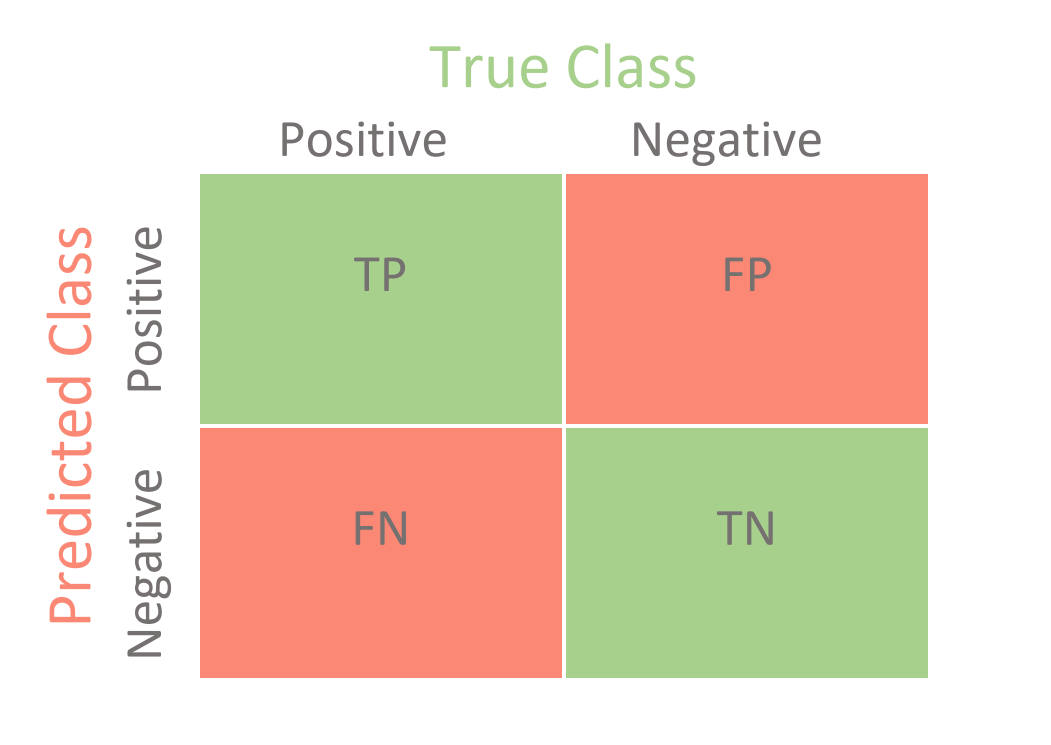

To evaluate our model we will use the confusion matrix as our base for the evaluation.

There are 6 metrics use to evaluate models:

1. Accuracy: the proportion of true results among the total number of cases examined.


<div align='center'>$Accuracy = \frac{TP+TN}{TP+TN+FP+FN}$</div>

  Where: TP = True Positive; FP = False Positive; TN = True Negative; FN = False Negative.
  
2. Precision: used to calculate how much proportion of all data that was predicted positive was actually positive.
<div align='center'>$Precision = \frac{TP}{TP+FP}$</div>

3. Recall: used to calculate how much proportion of actual positives is correctly classified.
<div align='center'>$Recall = \frac{TP}{TP+FN}$</div>


4. F1 score: a number between 0 and 1 and is the harmonic mean of precision and recall.
<div align='center'>$F1 = \frac{2TP}{2TP+FP+FN}$</div>

5. Cohen Kappa Score: Cohen's kappa measures the agreement between two raters who each classify N items into C mutually exclusive categories.
<div align='center'>$\kappa = \frac{p_o-p_e}{1-p_e}$</div>
    where $p_o$ is the empirical probability of agreement on the label assigned to any sample (the observed agreement ratio), and $p_e$ is the expected agreement when both annotators assign labels randomly. $p_e$ is estimated using a per-annotator empirical prior over the class labels.
    
6. Area Under Curve (AUC): indicates how well the probabilities from the positive classes are separated from the negative classes



In [36]:
# function to evaluate and calculate accuracy, precision, recall, F1-score and kappa score
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)*100
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    # Visualization of Confusion matrix
    plt.figure(figsize = (10,8))
    sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

## Feature Scaling
#### What is Feature Scaling?
Feature scaling is a method used to normalize the range of independent variables or features of data. In data processing, it is also known as data normalization and is generally performed during the data preprocessing step. Just to give you an example — if you have multiple independent variables like age, salary, and height; With their range as (18–100 Years), (25,000–75,000 Euros), and (1–2 Meters) respectively, feature scaling would help them all to be in the same range, for example- centered around 0 or in the range (0,1) depending on the scaling technique.

In order to visualize the above, let us take an example of the independent variables of alcohol and Malic Acid content in the wine dataset from the “Wine Dataset” that is deposited on the UCI machine learning repository. Below you can see the impact of the two most common scaling techniques (Normalization and Standardization) on the dataset.

### Normalization
Also known as min-max scaling or min-max normalization, it is the simplest method and consists of rescaling the range of features to scale the range in [0, 1]. The general formula for normalization is given as:

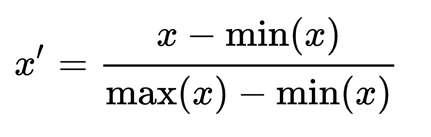
Here, max(x) and min(x) are the maximum and the minimum values of the feature respectively.

### Standardization
Feature standardization makes the values of each feature in the data have zero mean and unit variance. The general method of calculation is to determine the distribution mean and standard deviation for each feature and calculate the new data point by the following formula:

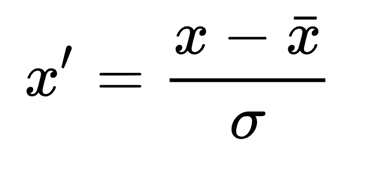
Here, σ is the standard deviation of the feature vector, and x̄ is the average of the feature vector.



In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### Logistic Regression

**Logistic Regression in Machine Learning**
* Logistic regression is one of the most popular Machine Learning algorithms, which comes under the Supervised Learning technique. It is used for predicting the categorical dependent variable using a given set of independent variables.
* Logistic regression predicts the output of a categorical dependent variable. Therefore the outcome must be a categorical or discrete value. It can be either Yes or No, 0 or 1, true or False, etc. but instead of giving the exact value as 0 and 1, it gives the probabilistic values which lie between 0 and 1.
* Logistic Regression is much similar to the Linear Regression except that how they are used. Linear Regression is used for solving Regression problems, whereas Logistic regression is used for solving the classification problems.
* In Logistic regression, instead of fitting a regression line, we fit an "S" shaped logistic function, which predicts two maximum values (0 or 1).
* The curve from the logistic function indicates the likelihood of something such as whether the cells are cancerous or not, a mouse is obese or not based on its weight, etc.
* Logistic Regression is a significant machine learning algorithm because it has the ability to provide probabilities and classify new data using continuous and discrete datasets.
* Logistic Regression can be used to classify the observations using different types of data and can easily determine the most effective variables used for the classification. The below image is showing the logistic function:

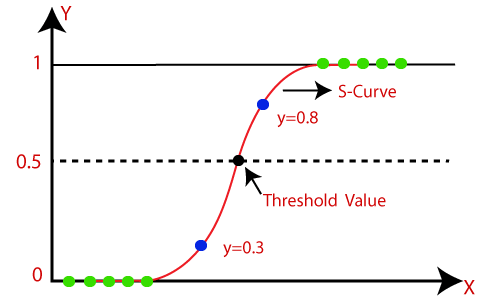

In [38]:
# Importing logistic Regression from linear model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 0)

### Fitting the model in training data

In [39]:
logreg.fit(x_train,y_train) # Fitting the model

LogisticRegression(random_state=0)

### Predicting the results

In [40]:
y_pred_lr = logreg.predict(x_test) # Predicting the results

### Caluculating confusion matrics

Accuracy: 89.4789246598075
Precision: 0.5986159169550173
Recall: 0.17162698412698413
F1 Score: 0.26676946800308404
Cohens Kappa Score: 0.2284246804965353
Area Under Curve: 0.7538832658369454
Confusion Matrix:
 [[7915  116]
 [ 835  173]]


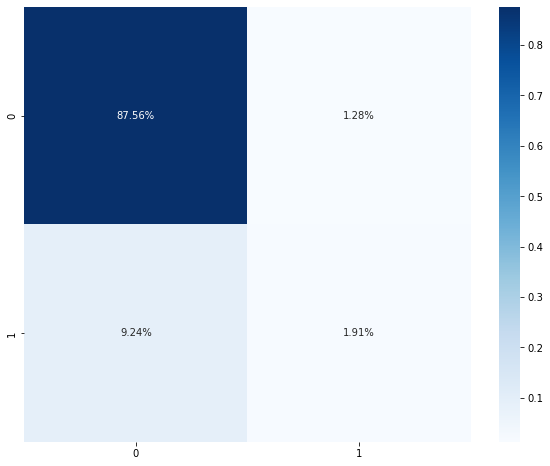

In [41]:
# Evaluate Decision Tree Model
logreg_score = evaluate_model(logreg, x_test, y_test)

# Print result
print('Accuracy:', logreg_score['acc'])
print('Precision:', logreg_score['prec'])
print('Recall:', logreg_score['rec'])
print('F1 Score:', logreg_score['f1'])
print('Cohens Kappa Score:', logreg_score['kappa'])
print('Area Under Curve:', logreg_score['auc'])
print('Confusion Matrix:\n', logreg_score['cm'])

### Decision tree classifier
## Decision Tree
Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.
Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

The branches/edges represent the result of the node and the nodes have either: 

1. Conditions [Decision Nodes]
2. Result [End Nodes] 

The branches/edges represent the truth/falsity of the statement and take makes a decision based on that in the example below which shows a decision tree that evaluates the smallest of three numbers:  

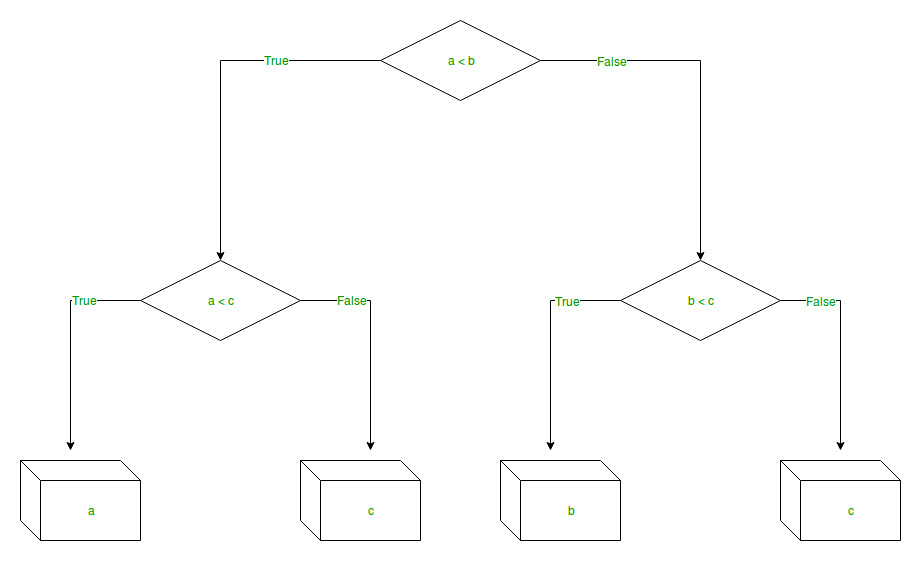

In [42]:
from sklearn.tree import DecisionTreeClassifier # Importing the decision tree model from tree
dtc = DecisionTreeClassifier()

In [43]:
dtc.fit(x_train, y_train) # FItting the trianing data

DecisionTreeClassifier()

In [44]:
y_pred_dtc = dtc.predict(x_test) #predicting the data

Accuracy: 83.27248589445735
Precision: 0.2896494156928214
Recall: 0.34424603174603174
F1 Score: 0.31459655485040794
Cohens Kappa Score: 0.22013851632303494
Area Under Curve: 0.619140821874759
Confusion Matrix:
 [[7180  851]
 [ 661  347]]


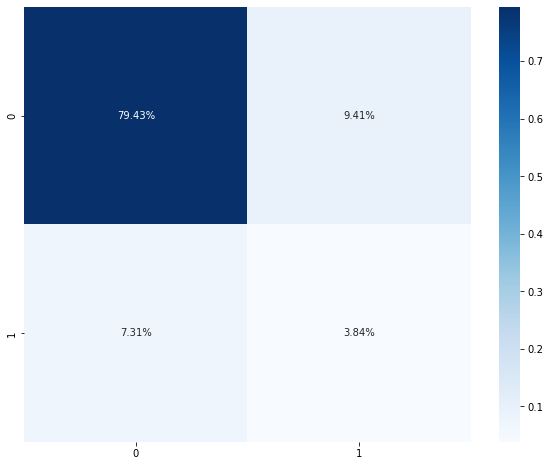

In [45]:
# Evaluate Decision Tree Model
dtc_eval = evaluate_model(dtc, x_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])
print('Confusion Matrix:\n', dtc_eval['cm'])

## Random Forest
Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

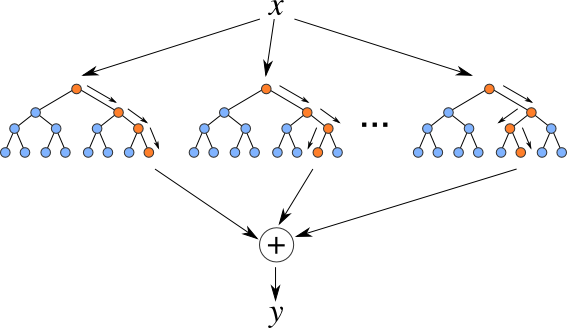

In [46]:
from sklearn.ensemble import RandomForestClassifier # Importing the random forest from ensemble
rfc = RandomForestClassifier()

In [47]:
rfc.fit(x_train, y_train) # Fitting the model

RandomForestClassifier()

In [48]:
y_pred_rfc = rfc.predict(x_test) # Predicting the model

Accuracy: 89.70018807390197
Precision: 0.592326139088729
Recall: 0.24503968253968253
F1 Score: 0.3466666666666666
Cohens Kappa Score: 0.30104843867928166
Area Under Curve: 0.7650296198461122
Confusion Matrix:
 [[7861  170]
 [ 761  247]]


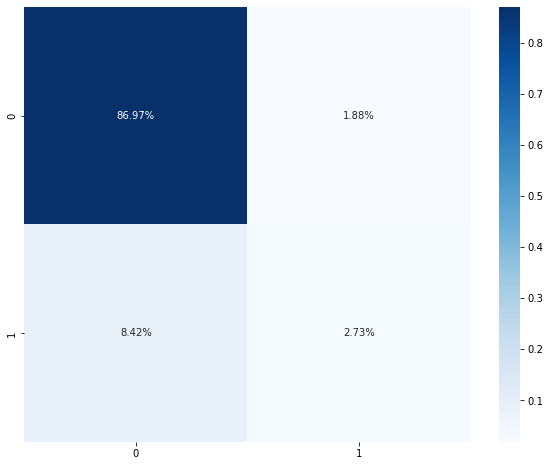

In [49]:
# Evaluate Decision Tree Model
rfc_eval = evaluate_model(rfc, x_test, y_test)

# Print result
print('Accuracy:', rfc_eval['acc'])
print('Precision:', rfc_eval['prec'])
print('Recall:', rfc_eval['rec'])
print('F1 Score:', rfc_eval['f1'])
print('Cohens Kappa Score:', rfc_eval['kappa'])
print('Area Under Curve:', rfc_eval['auc'])
print('Confusion Matrix:\n', rfc_eval['cm'])

### gradient boosting classifier

In [50]:
from sklearn.ensemble import GradientBoostingClassifier # Importing the gradient booster from ensemble
gbc = GradientBoostingClassifier()

In [51]:
gbc.fit(x_train, y_train)# Fitting the model

GradientBoostingClassifier()

In [52]:
y_pred_gbc = gbc.predict(x_test)# Predicting the model

Accuracy: 89.76656709813032
Precision: 0.628482972136223
Recall: 0.2013888888888889
F1 Score: 0.30503380916604056
Cohens Kappa Score: 0.2652666699532089
Area Under Curve: 0.780273686488666
Confusion Matrix:
 [[7911  120]
 [ 805  203]]


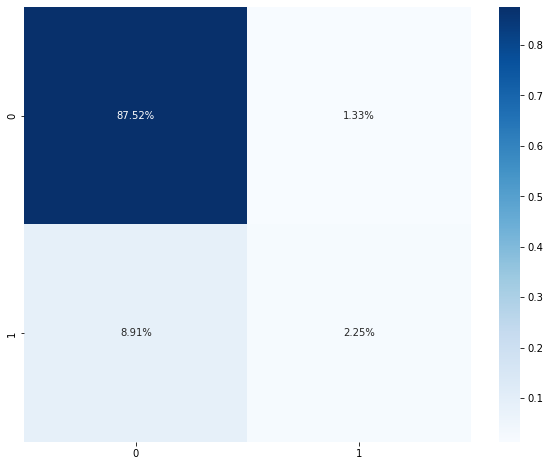

In [53]:
# Evaluate Decision Tree Model
gbc_eval = evaluate_model(gbc, x_test, y_test)

# Print result
print('Accuracy:', gbc_eval['acc'])
print('Precision:', gbc_eval['prec'])
print('Recall:', gbc_eval['rec'])
print('F1 Score:', gbc_eval['f1'])
print('Cohens Kappa Score:', gbc_eval['kappa'])
print('Area Under Curve:', gbc_eval['auc'])
print('Confusion Matrix:\n', gbc_eval['cm'])

### XG boost

In [54]:
from xgboost.sklearn import XGBClassifier # Importing the xgb classifier from sklearn
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 6, min_child_weight = 5, gamma = 0,
                    subsample = 0.9, colsample_bytree = 0.9, scale_pos_weight = 1)

In [55]:
xgb.fit(x_train, y_train)# Fitting the model

[11:59:58] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.9, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [56]:
y_pred_xgb = xgb.predict(x_test)# Predicting the model

Accuracy: 89.6669985617878
Precision: 0.5973684210526315
Recall: 0.2251984126984127
F1 Score: 0.32708933717579247
Cohens Kappa Score: 0.28332863046784507
Area Under Curve: 0.788092038687388
Confusion Matrix:
 [[7878  153]
 [ 781  227]]


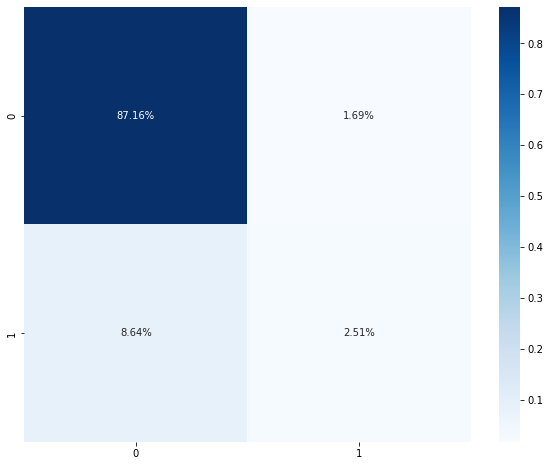

In [57]:
# Evaluate Decision Tree Model
xgb_eval = evaluate_model(xgb, x_test, y_test)

# Print result
print('Accuracy:', xgb_eval['acc'])
print('Precision:', xgb_eval['prec'])
print('Recall:', xgb_eval['rec'])
print('F1 Score:', xgb_eval['f1'])
print('Cohens Kappa Score:', xgb_eval['kappa'])
print('Area Under Curve:', xgb_eval['auc'])
print('Confusion Matrix:\n', xgb_eval['cm'])

### SVC

In [58]:
from sklearn.svm import SVC # Importing svc from svm
svc = SVC()

In [59]:
svc.fit(x_train, y_train)# Fitting the model

SVC()

In [60]:
y_pred_svc = svc.predict(x_test)# Predicting the model

In [61]:
#Importing precision recall, recall score, accuracy score and f1 score
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score 
from sklearn import metrics
from sklearn.metrics import confusion_matrix

Accuracy =  89.7555039274256
Precision =  0.6205882352941177
Recall =  0.20932539682539683
F1 Score =  0.31305637982195844


<AxesSubplot:>

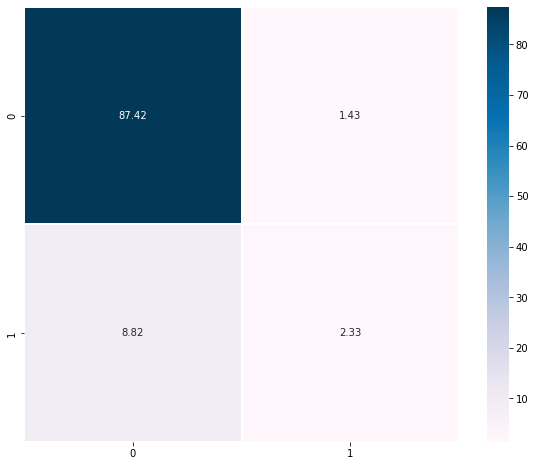

In [62]:
# Printing the evaluation matrics
print("Accuracy = " , accuracy_score(y_test, y_pred_svc)*100)
print("Precision = " ,precision_score(y_test, y_pred_svc))
print("Recall = " ,recall_score(y_test, y_pred_svc))
print("F1 Score = " ,f1_score(y_test, y_pred_svc))

plt.figure(figsize = (10,8))
cm = confusion_matrix(y_test,y_pred_svc)
sns.heatmap((cm/np.sum(cm))*100, annot=True, fmt=".2f", linewidths=.3, 
        square = True, cmap = 'PuBu')

In [63]:
overall_scores = pd.DataFrame({'Logistic Regression': (logreg_score['acc']),
                              'Decision Tree Classifier': (dtc_eval['acc']),
                              'Random Forest Classifer': (rfc_eval['acc']),
                              'Gradient Boosting Classifier': (gbc_eval['acc']),
                              'XGBoost': (xgb_eval['acc']),
                              'SVC': (accuracy_score(y_test, y_pred_svc))*100}, index = [0])
overall_scores.T.rename(columns = {0:'Accuracy Scores'})

,Accuracy Scores
Logistic Regression,89.478925
Decision Tree Classifier,83.272486
Random Forest Classifer,89.700188
Gradient Boosting Classifier,89.766567
XGBoost,89.666999
SVC,89.755504


In terms of accuracy, Classifier like Logisitic Regression, Random Forest, Gradient Boosting classifier, XGB and SVC gives almost the same score i.e., 89%.